In [26]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Prepare dataset

In [2]:
df = pd.read_csv('data.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df_numbers = df.copy().select_dtypes(include=['int64', 'float64'])

null_values = df_numbers.isnull().any(axis=1)
df.drop(df_numbers[null_values].index, axis=0, inplace=True)
df_numbers.drop(df_numbers[null_values].index, axis=0, inplace=True)


target = df['Value']
target = target.str.replace('€', '')
target = (target.replace(r'[KM]+$', '', regex=True).astype(float) * \
          target.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))

## KNN Regression

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_numbers, target, random_state=0)

## find a suitable K
best_k = 1
best_score = 0
for k in [1,3,7,15,51,101]:
    knnreg = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    if test_score > best_score:
        best_score = test_score
        best_k = k

knnreg = KNeighborsRegressor(n_neighbors=best_k).fit(X_train, y_train)
test_score = knnreg.score(X_test, y_test)
train_score = knnreg.score(X_train, y_train)

print('R squared train set score: {}'.format(train_score))
print('R squred test set score: {}'.format(test_score))

R squared train set score: 0.8518246743321432
R squred test set score: 0.7495266319297454


## Plot 10 random players prediction and actual prices

<IPython.core.display.Javascript object>


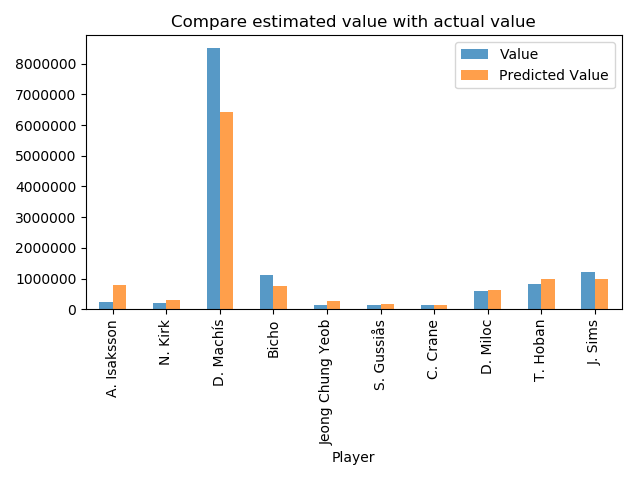

In [4]:
sample_players = df_numbers.sample(10)
actual_values = target.loc[sample_players.index]
pred_values = knnreg.predict(sample_players)

_df = df.loc[sample_players.index]
_df = _df[['Name']]
_df['Value'] = actual_values
_df['Predicted Value'] = pred_values

ax = _df.plot(kind='bar', x='Name', alpha=0.75)
ax.set_xlabel('Player')
ax.set_title('Compare estimated value with actual value')
plt.gcf().tight_layout()

## Simple Linear regression using 1 feature

<IPython.core.display.Javascript object>


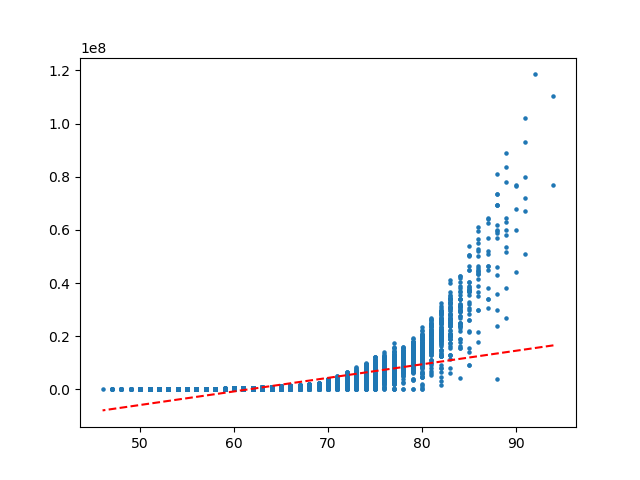

linear model coeff (w): [509841.24393258]
linear model intercept (b): -31355298.16150584
R-squared train score: 0.387248594265435
R-squared test score: 0.4131816387450168


In [20]:
_x = df_numbers['Overall']
_y = target

X_train, X_test, y_train, y_test = train_test_split(np.array(_x).reshape(-1,1), target, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

plt.figure()
plt.scatter(_x, _y, s=5)
plt.show()

plt.plot(_x, linreg.coef_ * _x + linreg.intercept_, 'r--')

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared train score: {}'.format(linreg.score(X_train, y_train)))
print('R-squared test score: {}'.format(linreg.score(X_test, y_test)))

## Now using all features

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_numbers, target, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)
print('R-squared train score: {}'.format(linreg.score(X_train, y_train)))
print('R-squared test score: {}'.format(linreg.score(X_test, y_test)))

R-squared train score: 0.6195951648550309
R-squared test score: 0.6111924317915318


## Lasso and Ridge with regularization

In [35]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(df_numbers, target, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for alpha in [0,1,10,20,50,100,1000]:
    linridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)
    print('Linear regression score alpha({}): {}'.format(alpha, linridge.score(X_test_scaled, y_test)))
    print('Number of abs coeff > 1: {}'.format(np.sum(abs(linridge.coef_) > 1.0)))
    
    

Linear regression score alpha(0): 0.6111924317915317
Number of abs coeff > 1: 42
Linear regression score alpha(1): 0.6114852597744348
Number of abs coeff > 1: 42
Linear regression score alpha(10): 0.6114097536194236
Number of abs coeff > 1: 42
Linear regression score alpha(20): 0.6084863605224495
Number of abs coeff > 1: 42
Linear regression score alpha(50): 0.5957449863148492
Number of abs coeff > 1: 42
Linear regression score alpha(100): 0.5725255071365118
Number of abs coeff > 1: 42
Linear regression score alpha(1000): 0.3768128700023803
Number of abs coeff > 1: 42


C:\Users\Ivory\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
